In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [449]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [450]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [451]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536913 entries, 0 to 1536912
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1536913 non-null  int64  
 1   kWh       1536913 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 23.5 MB


In [452]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1536908    0.13
1536909    0.14
1536910    0.13
1536911    0.13
1536912    0.13
Name: kWh, Length: 1536913, dtype: float64

In [453]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1536908    0.13
1536909    0.14
1536910    0.13
1536911    0.13
1536912    0.13
Name: kWh, Length: 1536913, dtype: float64

In [454]:
l=len(conso_data)-1
l

1536912

In [455]:
conso_data['sec']=conso_data['Interval']/1000


In [456]:
conso_data['Wh']=3600000/conso_data['Interval']


In [457]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [458]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536913 entries, 0 to 1536912
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1536913 non-null  int64  
 1   kWh        1536913 non-null  float64
 2   sec        1536913 non-null  float64
 3   Wh         1536913 non-null  float64
 4   cumul(ms)  1536913 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 58.6 MB


In [459]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1536908,27111,0.13,27.111,132.787429,38062794169
1536909,26407,0.14,26.407,136.327489,38062820576
1536910,27769,0.13,27.769,129.640967,38062848345
1536911,27628,0.13,27.628,130.302592,38062875973
1536912,27910,0.13,27.910,128.986027,38062903883


In [460]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

38062903883000

In [461]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 44, 28, 285243)

In [462]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [463]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [464]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [465]:
conso_data['dates']

0         2023-08-21 18:44:50.219243
1         2023-08-21 18:45:12.077243
2         2023-08-21 18:45:34.078243
3         2023-08-21 18:45:56.006243
4         2023-08-21 18:46:17.897243
                     ...            
1536908   2024-11-04 07:44:22.454243
1536909   2024-11-04 07:44:48.861243
1536910   2024-11-04 07:45:16.630243
1536911   2024-11-04 07:45:44.258243
1536912   2024-11-04 07:46:12.168243
Name: dates, Length: 1536913, dtype: datetime64[ns]

## créer les dates

In [466]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:44:50.219243,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:45:12.077243,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:45:34.078243,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:45:56.006243,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:46:17.897243,21/08/23
...,...,...,...,...,...,...,...
1536908,27111,0.13,27.111,132.787429,38062794169,2024-11-04 07:44:22.454243,04/11/24
1536909,26407,0.14,26.407,136.327489,38062820576,2024-11-04 07:44:48.861243,04/11/24
1536910,27769,0.13,27.769,129.640967,38062848345,2024-11-04 07:45:16.630243,04/11/24
1536911,27628,0.13,27.628,130.302592,38062875973,2024-11-04 07:45:44.258243,04/11/24


### save conso_data with dates

In [467]:
#to_csv('conso_data_with_dates.csv',conso_data)

# tranche journalière


In [468]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('04/11/24', 4, 11, 2024)

In [469]:
here = now.strftime('%H:%M:%S')
here

'07:46:39'

In [470]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [471]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 1536021 to 1536912
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   892 non-null    int64         
 1   kWh        892 non-null    float64       
 2   sec        892 non-null    float64       
 3   Wh         892 non-null    float64       
 4   cumul(ms)  892 non-null    int64         
 5   dates      892 non-null    datetime64[ns]
 6   days       892 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 55.8+ KB


In [472]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [473]:
data = list(df_grp['kWh'])
print(data)

[0.879, 3.699, 4.227, 3.69, 4.203, 4.628, 3.492, 3.397, 3.531, 3.683, 3.827, 3.731, 4.257, 3.848, 3.43, 3.631, 3.326, 3.447, 4.239, 4.01, 4.06, 3.9, 3.433, 4.483, 3.704, 3.806, 4.416, 4.662, 3.739, 3.224, 3.172, 4.045, 3.635, 3.181, 3.792, 4.173, 3.742, 3.558, 4.81, 4.169, 4.542, 3.773, 3.386, 4.315, 3.881, 3.876, 3.433, 4.075, 3.651, 3.405, 4.112, 3.399, 3.889, 3.83, 3.648, 3.747, 4.244, 3.287, 3.878, 2.965, 2.055, 2.041, 2.477, 4.085, 3.738, 4.324, 3.635, 3.899, 3.746, 3.954, 3.942, 4.134, 3.659, 3.141, 3.795, 3.547, 3.593, 3.704, 3.686, 3.233, 3.908, 3.264, 3.748, 3.588, 4.097, 3.641, 3.299, 3.826, 4.066, 4.384, 4.084, 3.999, 4.221, 3.745, 3.931, 3.874, 3.911, 3.75, 4.037, 4.337, 3.883, 3.531, 3.66, 3.67, 3.339, 3.855, 3.986, 4.119, 3.465, 4.178, 3.605, 4.123, 4.498, 3.69, 3.413, 3.591, 4.188, 3.656, 4.079, 3.982, 3.754, 3.581, 5.142, 3.699, 3.76, 4.3, 4.086, 4.774, 4.396, 3.943, 3.804, 4.372, 4.636, 4.235, 4.777, 4.345, 3.669, 4.234, 3.684, 3.615, 3.528, 3.967, 3.64, 3.789, 3.591, 

In [474]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [475]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [476]:
df = conso_data
len(df)

1536913

In [477]:
period(p=2)

2023-08-22 00:51:04.022243	2023-08-22 07:55:19.642243	7h 4m 15s 	2000


In [478]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.291691
dtype: float64

In [479]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.477179
dtype: float64

In [480]:
last=df_grp.iloc[-1]['kWh']
last

0.892

In [481]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 1536021 to 1536912
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   892 non-null    int64         
 1   kWh        892 non-null    float64       
 2   sec        892 non-null    float64       
 3   Wh         892 non-null    float64       
 4   cumul(ms)  892 non-null    int64         
 5   dates      892 non-null    datetime64[ns]
 6   days       892 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 55.8+ KB


In [482]:
# select day
day = today
#day = '16/08/24'


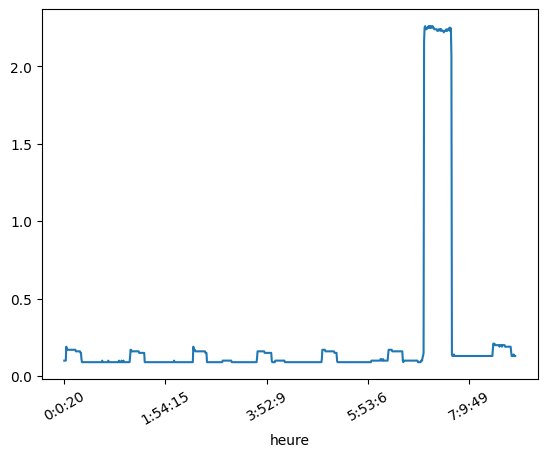

In [483]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [484]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:44:50.219243,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:45:12.077243,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:45:34.078243,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:45:56.006243,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:46:17.897243,21/08/23
...,...,...,...,...,...,...,...
1536908,27111,0.13,27.111,132.787429,38062794169,2024-11-04 07:44:22.454243,04/11/24
1536909,26407,0.14,26.407,136.327489,38062820576,2024-11-04 07:44:48.861243,04/11/24
1536910,27769,0.13,27.769,129.640967,38062848345,2024-11-04 07:45:16.630243,04/11/24
1536911,27628,0.13,27.628,130.302592,38062875973,2024-11-04 07:45:44.258243,04/11/24


In [485]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:20,36716,0.10,36.716,98.049897,38034952277,2024-11-04 00:00:20.562243,04/11/24
0:0:57,36775,0.10,36.775,97.892590,38034989052,2024-11-04 00:00:57.337243,04/11/24
0:1:32,34665,0.10,34.665,103.851147,38035023717,2024-11-04 00:01:32.002243,04/11/24
0:2:6,34174,0.10,34.174,105.343243,38035057891,2024-11-04 00:02:06.176243,04/11/24
0:2:24,18791,0.19,18.791,191.581076,38035076682,2024-11-04 00:02:24.967243,04/11/24
...,...,...,...,...,...,...,...
7:44:22,27111,0.13,27.111,132.787429,38062794169,2024-11-04 07:44:22.454243,04/11/24
7:44:48,26407,0.14,26.407,136.327489,38062820576,2024-11-04 07:44:48.861243,04/11/24
7:45:16,27769,0.13,27.769,129.640967,38062848345,2024-11-04 07:45:16.630243,04/11/24


In [486]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 02/11/24 4.085
Min : 05/10/24 1.785


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1536021,36716,0.10,36.716,98.049897,38034952277,2024-11-04 00:00:20.562243,04/11/24,0:0:20
1536022,36775,0.10,36.775,97.892590,38034989052,2024-11-04 00:00:57.337243,04/11/24,0:0:57
1536023,34665,0.10,34.665,103.851147,38035023717,2024-11-04 00:01:32.002243,04/11/24,0:1:32
1536024,34174,0.10,34.174,105.343243,38035057891,2024-11-04 00:02:06.176243,04/11/24,0:2:6
1536025,18791,0.19,18.791,191.581076,38035076682,2024-11-04 00:02:24.967243,04/11/24,0:2:24
...,...,...,...,...,...,...,...,...
1536908,27111,0.13,27.111,132.787429,38062794169,2024-11-04 07:44:22.454243,04/11/24,7:44:22
1536909,26407,0.14,26.407,136.327489,38062820576,2024-11-04 07:44:48.861243,04/11/24,7:44:48
1536910,27769,0.13,27.769,129.640967,38062848345,2024-11-04 07:45:16.630243,04/11/24,7:45:16
1536911,27628,0.13,27.628,130.302592,38062875973,2024-11-04 07:45:44.258243,04/11/24,7:45:44


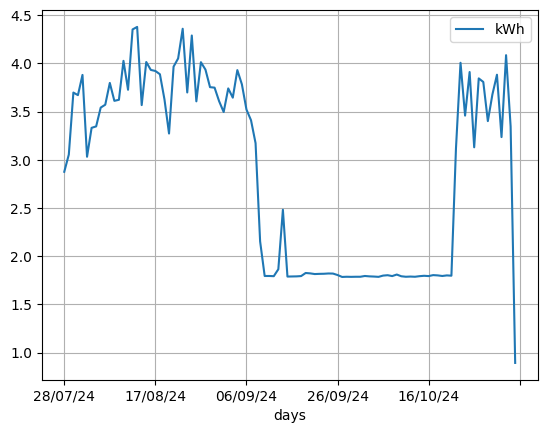

In [487]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-04 00:00:20.562243	2024-11-04 07:46:12.168243	7h 45m 51s 	892
<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 1536021 to 1536912
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   892 non-null    int64         
 1   kWh        892 non-null    float64       
 2   sec        892 non-null    float64       
 3   Wh         892 non-null    float64       
 4   cumul(ms)  892 non-null    int64         
 5   dates      892 non-null    datetime64[ns]
 6   days       892 non-null    object        
 7   heure      892 non-null    object        
 8   hours      892 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 69.7+ KB


('04/11/24', <Axes: xlabel='hours'>)

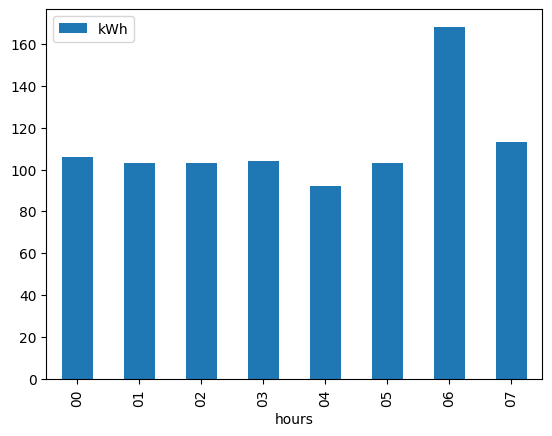

In [488]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [489]:
df_grp

,kWh
days,
21/08/23,0.879
22/08/23,3.699
23/08/23,4.227
24/08/23,3.690
25/08/23,4.203
...,...
31/10/24,3.882
01/11/24,3.235
02/11/24,4.085


In [490]:
# select number of days to display
span = 30
#df_grp.tail(span)


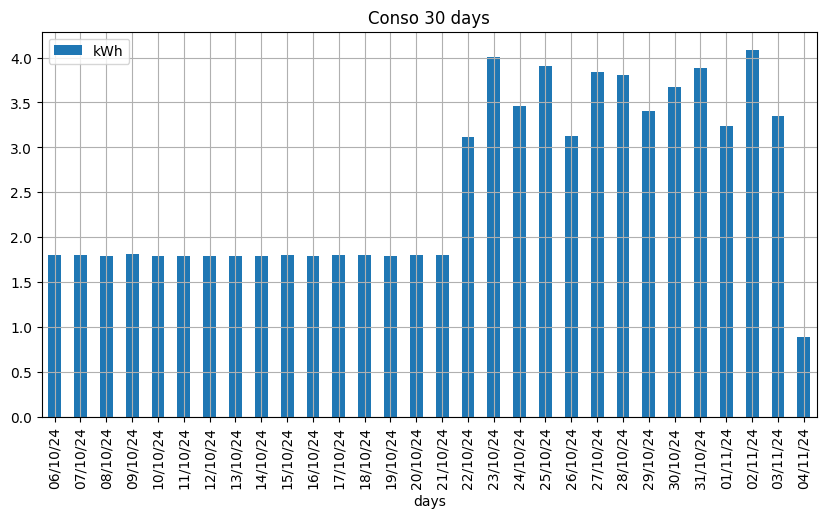

In [491]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


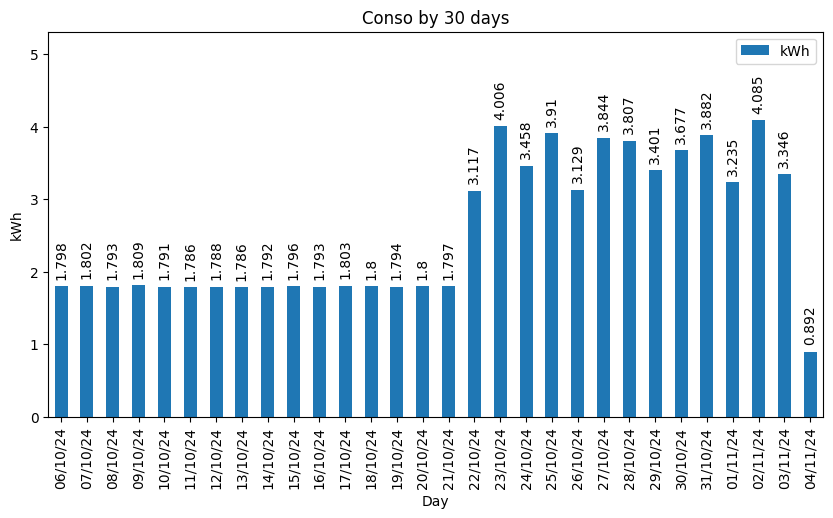

In [492]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [493]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
06/10/24    1.798
07/10/24    1.802
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.786
12/10/24    1.788
13/10/24    1.786
14/10/24    1.792
15/10/24    1.796
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.797
22/10/24    3.117
23/10/24    4.006
24/10/24    3.458
25/10/24    3.910
26/10/24    3.129
27/10/24    3.844
28/10/24    3.807
29/10/24    3.401
30/10/24    3.677
31/10/24    3.882
01/11/24    3.235
02/11/24    4.085
03/11/24    3.346
04/11/24    0.892
Name: kWh, dtype: float64

In [494]:
x_labels=df_grp.tail(span).index
x_labels

Index(['06/10/24', '07/10/24', '08/10/24', '09/10/24', '10/10/24', '11/10/24',
       '12/10/24', '13/10/24', '14/10/24', '15/10/24', '16/10/24', '17/10/24',
       '18/10/24', '19/10/24', '20/10/24', '21/10/24', '22/10/24', '23/10/24',
       '24/10/24', '25/10/24', '26/10/24', '27/10/24', '28/10/24', '29/10/24',
       '30/10/24', '31/10/24', '01/11/24', '02/11/24', '03/11/24', '04/11/24'],
      dtype='object', name='days')

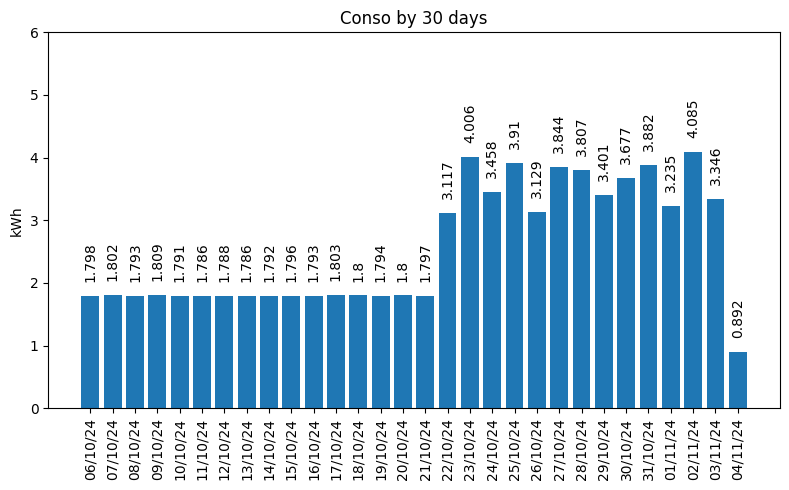

In [495]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [496]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

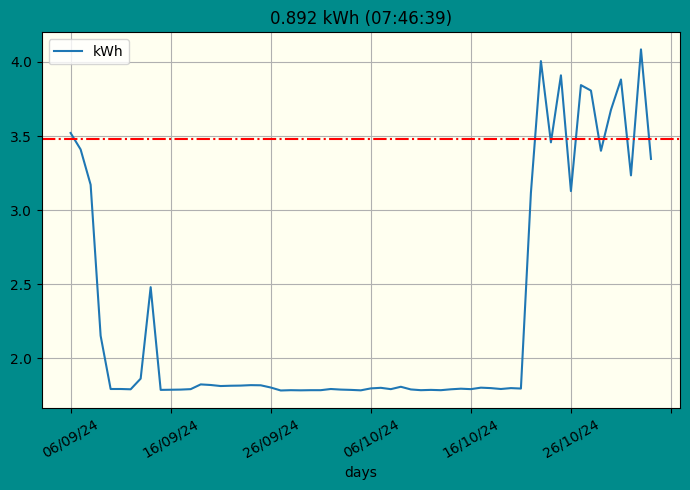

In [497]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

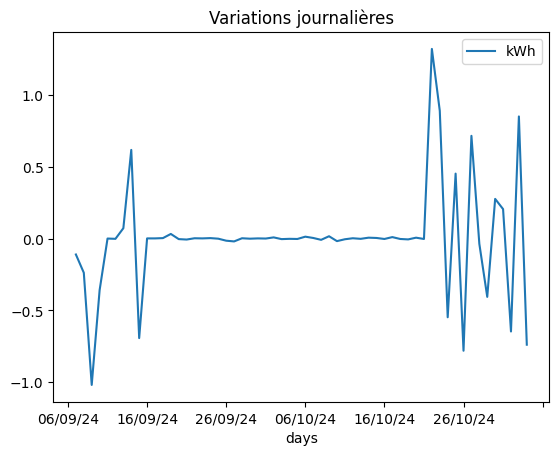

In [498]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [499]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:44:50.219243,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:45:12.077243,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:45:34.078243,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:45:56.006243,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:46:17.897243,21/08/23,18
...,...,...,...,...,...,...,...,...
1536908,27111,0.13,27.111,132.787429,38062794169,2024-11-04 07:44:22.454243,04/11/24,07
1536909,26407,0.14,26.407,136.327489,38062820576,2024-11-04 07:44:48.861243,04/11/24,07
1536910,27769,0.13,27.769,129.640967,38062848345,2024-11-04 07:45:16.630243,04/11/24,07
1536911,27628,0.13,27.628,130.302592,38062875973,2024-11-04 07:45:44.258243,04/11/24,07


In [500]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [501]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [502]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [503]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [504]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,879
22/08/23,3699
23/08/23,4227
24/08/23,3690
25/08/23,4203
...,...
31/10/24,3882
01/11/24,3235
02/11/24,4085


In [505]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:44:50.219243,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:45:12.077243,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:45:34.078243,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:45:56.006243,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:46:17.897243,21/08/23,18
...,...,...,...,...,...,...,...,...
1536908,27111,0.13,27.111,132.787429,38062794169,2024-11-04 07:44:22.454243,04/11/24,07
1536909,26407,0.14,26.407,136.327489,38062820576,2024-11-04 07:44:48.861243,04/11/24,07
1536910,27769,0.13,27.769,129.640967,38062848345,2024-11-04 07:45:16.630243,04/11/24,07
1536911,27628,0.13,27.628,130.302592,38062875973,2024-11-04 07:45:44.258243,04/11/24,07


In [506]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 18    0        21/08/23    18  0.16
               1        21/08/23    18  0.16
               2        21/08/23    18  0.16
               3        21/08/23    18  0.16
               4        21/08/23    18  0.16
...                          ...   ...   ...
04/11/24 07    1536908  04/11/24    07  0.13
               1536909  04/11/24    07  0.14
               1536910  04/11/24    07  0.13
               1536911  04/11/24    07  0.13
               1536912  04/11/24    07  0.13

[1536913 rows x 3 columns]

In [507]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [508]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '18'), ('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('23/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/2

In [509]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,879,879
22/08/23,3699,3699
23/08/23,4227,4227
24/08/23,3690,3690
25/08/23,4203,4203
...,...,...
31/10/24,3882,3882
01/11/24,3235,3235
02/11/24,4085,4085


In [510]:
grp_by_day['kWh'].cumsum()

days
21/08/23        879
22/08/23       4578
23/08/23       8805
24/08/23      12495
25/08/23      16698
             ...   
31/10/24    1525355
01/11/24    1528590
02/11/24    1532675
03/11/24    1536021
04/11/24    1536913
Name: kWh, Length: 442, dtype: int64

In [511]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 18      42
         19     274
         20     169
         21     130
         22     131
...             ...
04/11/24 03     104
         04      92
         05     103
         06     168
         07     113

[10574 rows x 1 columns]

In [512]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  18            42
          19           316
          20           485
          21           615
          22           746
                    ...   
04/11/24  03       1536437
          04       1536529
          05       1536632
          06       1536800
          07       1536913
Name: kWh, Length: 10574, dtype: int64

In [513]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 18      42      42    NaN
         19     274     316  232.0
         20     169     485 -105.0
         21     130     615  -39.0
         22     131     746    1.0
...             ...     ...    ...
04/11/24 03     104     416    1.0
         04      92     508  -12.0
         05     103     611   11.0
         06     168     779   65.0
         07     113     892  -55.0

[10574 rows x 3 columns]

In [514]:
today, grp_by_dayhours.loc[today]

('04/11/24',
        kWh  cumsum  diff
 hours                   
 00     106     106   NaN
 01     103     209  -3.0
 02     103     312   0.0
 03     104     416   1.0
 04      92     508 -12.0
 05     103     611  11.0
 06     168     779  65.0
 07     113     892 -55.0)

Text(0.5, 1.0, 'Cumul journalier')

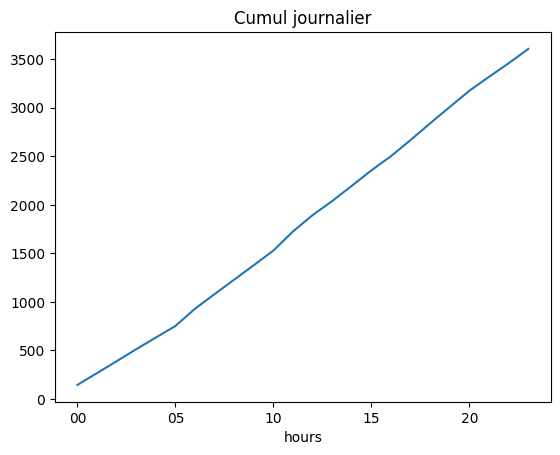

In [515]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

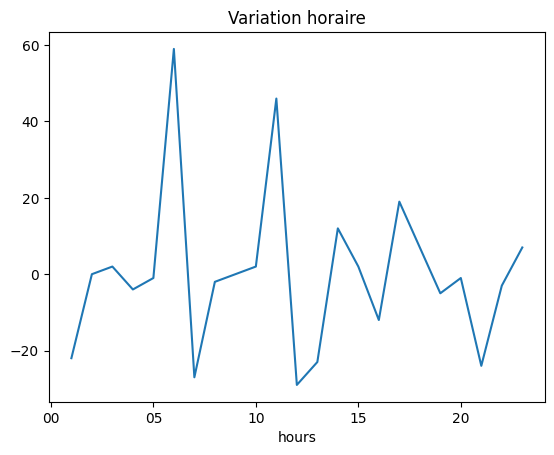

In [516]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [517]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

442

Text(0.5, 1.0, '442 days')

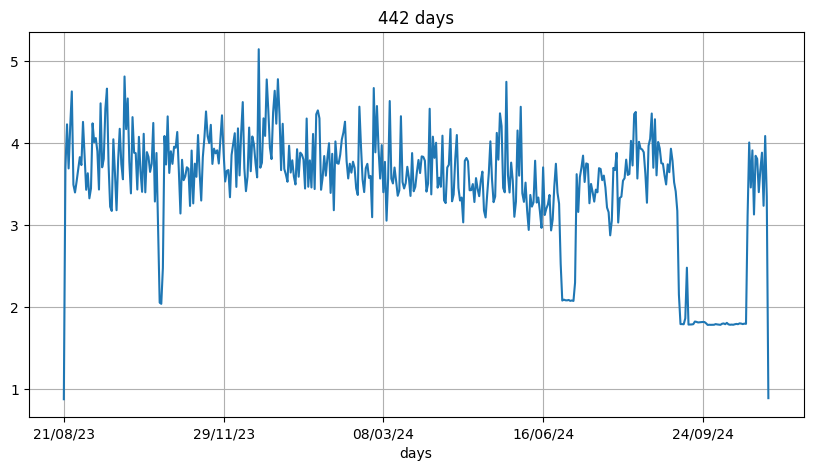

In [518]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

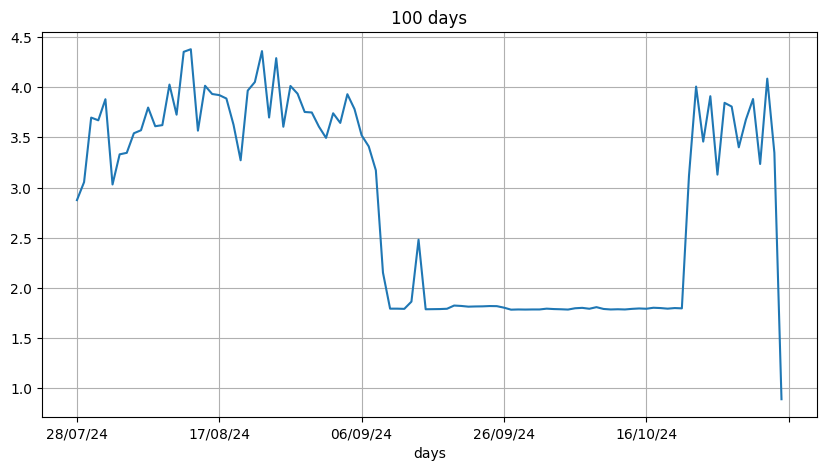

In [519]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [520]:
df_grp.tail(span)['kWh']

days
28/07/24    2.875
29/07/24    3.054
30/07/24    3.697
31/07/24    3.670
01/08/24    3.880
            ...  
31/10/24    3.882
01/11/24    3.235
02/11/24    4.085
03/11/24    3.346
04/11/24    0.892
Name: kWh, Length: 100, dtype: float64

In [521]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,106,106,NaN
01,103,209,-3.0
02,103,312,0.0
03,104,416,1.0
04,92,508,-12.0
05,103,611,11.0
06,168,779,65.0
07,113,892,-55.0


In [522]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


8

In [523]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 9)

In [524]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [525]:
grp_by_dayhours.loc[day,'days'].values

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [526]:
grp_by_dayhours.loc[day,'days']

hours
00    1.0
01    2.0
02    3.0
03    4.0
04    5.0
05    6.0
06    7.0
07    8.0
Name: days, dtype: float64

In [527]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [528]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 00 to 07
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     8 non-null      int64  
 1   cumsum  8 non-null      int64  
 2   diff    7 non-null      float64
 3   days    8 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 320.0+ bytes


In [529]:
grp_by_dayhours.loc[day,'days']

hours
00    1.0
01    2.0
02    3.0
03    4.0
04    5.0
05    6.0
06    7.0
07    8.0
Name: days, dtype: float64

In [530]:
day

'04/11/24'

In [531]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,106,106,NaN,1.0
01,103,209,-3.0,2.0
02,103,312,0.0,3.0
03,104,416,1.0,4.0
04,92,508,-12.0,5.0
05,103,611,11.0,6.0
06,168,779,65.0,7.0
07,113,892,-55.0,8.0


Text(0.5, 1.0, '04/11/24')

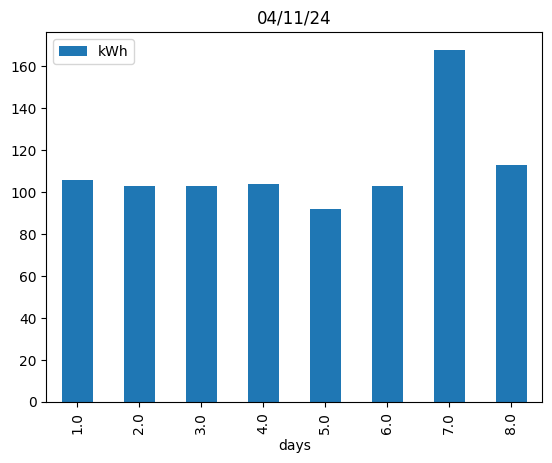

In [532]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [533]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07'], dtype='object', name='hours')

# Conso du jour


In [534]:
groupedbyhour.count()

,kWh
hours,
00,106
01,103
02,103
03,104
04,92
05,103
06,168
07,113


In [535]:
day = '13/09/24'
#day = today
grp_by_dayhours.loc[day].kWh

hours
00     77
01     77
02     77
03     78
04     76
05     75
06     76
07     75
08     73
09     73
10     73
11     73
12     73
13     73
14     73
15     73
16     74
17     73
18     73
19     76
20     76
21     85
22    105
23    107
Name: kWh, dtype: int64

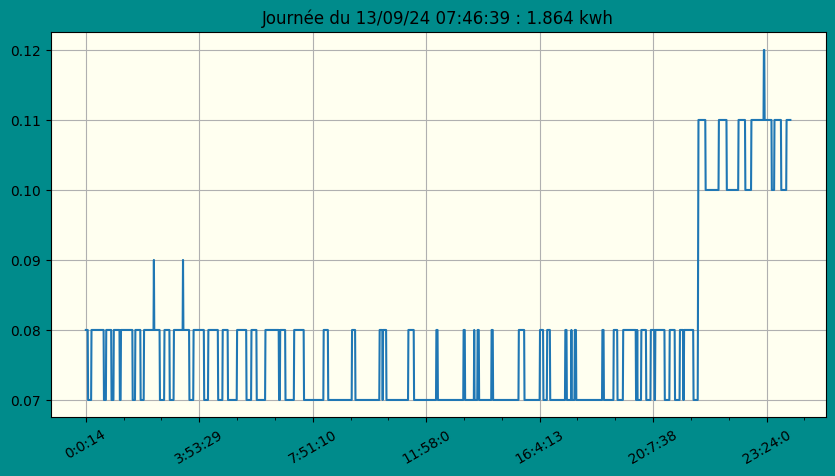

In [536]:
show('13/09/24',bgcolor='ivory')

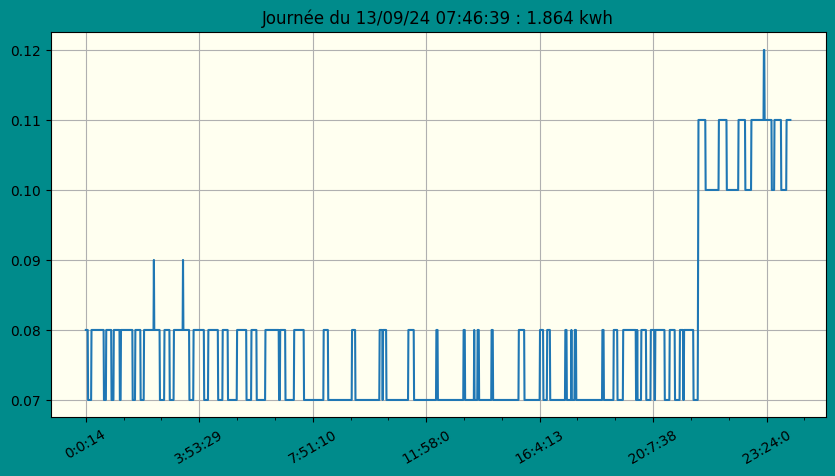

In [537]:
show(day,bgcolor='ivory')

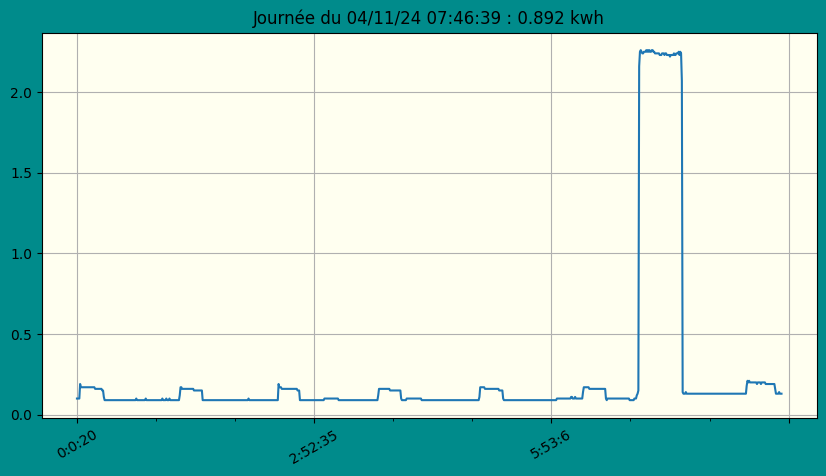

In [538]:
# retour vietnam 22/10/2024
show(today,bgcolor='ivory')

In [539]:
today

'04/11/24'

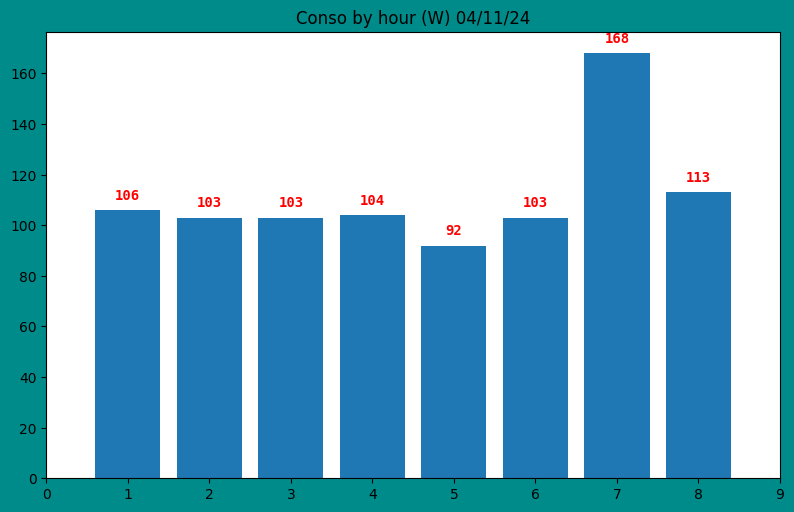

In [541]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_dayhours.loc[today].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [544]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,106,106,NaN,1.0
01,103,209,-3.0,2.0
02,103,312,0.0,3.0
03,104,416,1.0,4.0
04,92,508,-12.0,5.0
05,103,611,11.0,6.0
06,168,779,65.0,7.0
07,113,892,-55.0,8.0


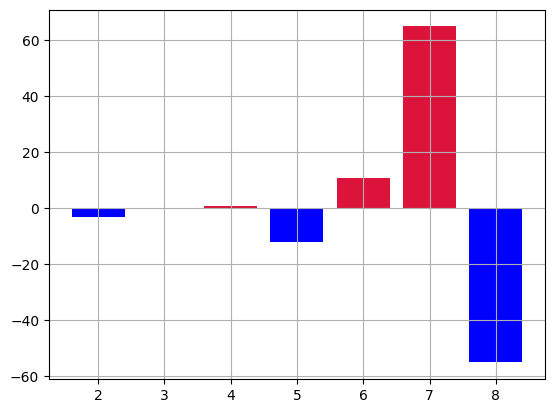

In [545]:
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

<Axes: xlabel='hours'>

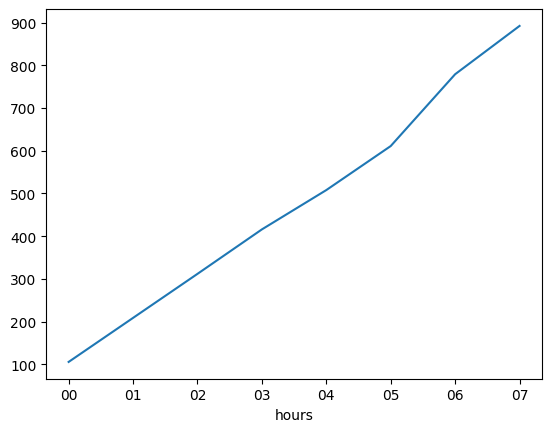

In [546]:
data.cumsum().plot()


<Axes: xlabel='hours'>

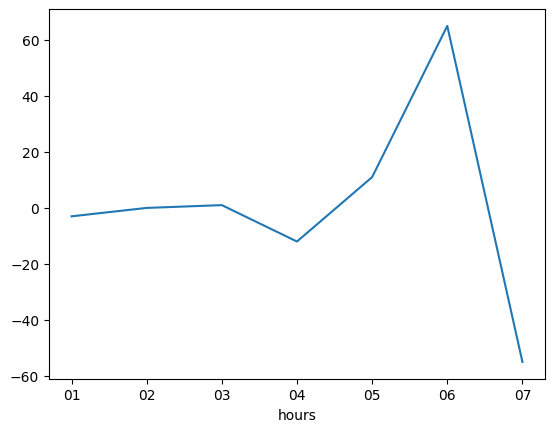

In [547]:
data.diff().plot()

# Test

In [548]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [549]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [550]:
#conso_byhour(day)

In [551]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

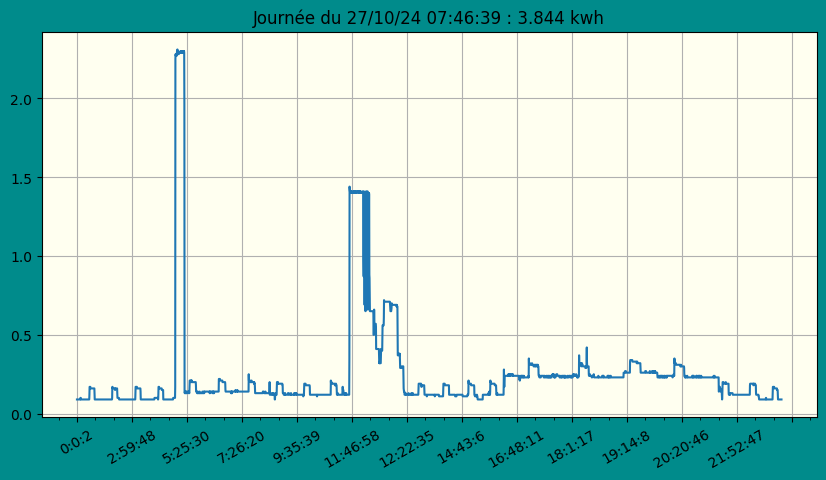

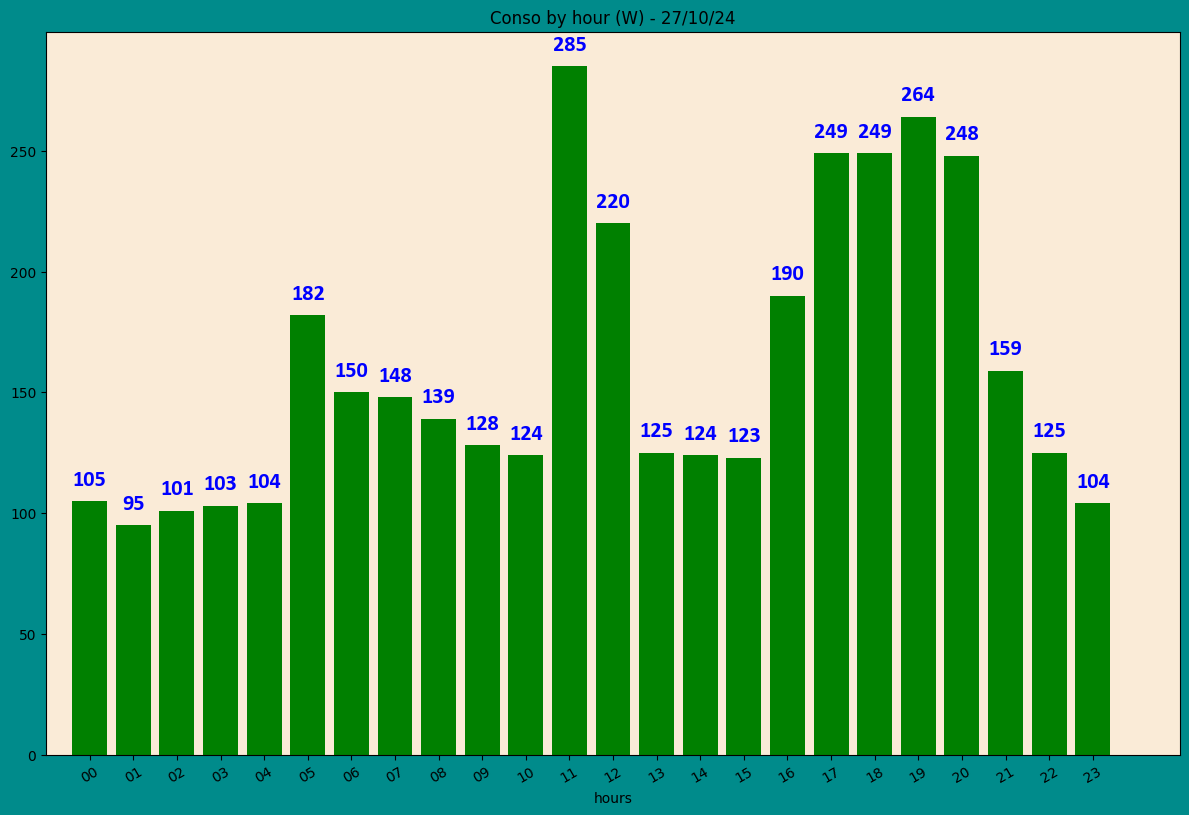

In [552]:
# plot any day
day = '27/10/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

<Axes: xlabel='days'>

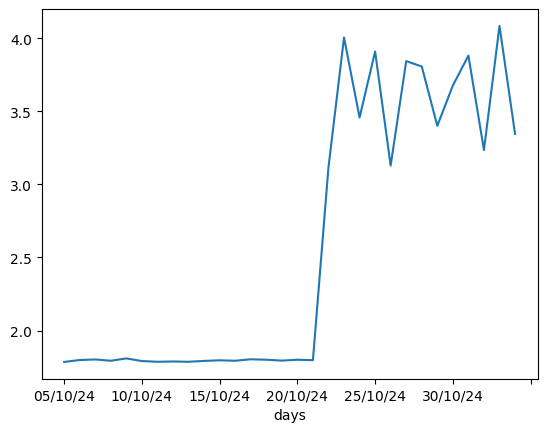

In [553]:
month.plot()


In [554]:
month

days
05/10/24    1.785
06/10/24    1.798
07/10/24    1.802
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.786
12/10/24    1.788
13/10/24    1.786
14/10/24    1.792
15/10/24    1.796
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.797
22/10/24    3.117
23/10/24    4.006
24/10/24    3.458
25/10/24    3.910
26/10/24    3.129
27/10/24    3.844
28/10/24    3.807
29/10/24    3.401
30/10/24    3.677
31/10/24    3.882
01/11/24    3.235
02/11/24    4.085
03/11/24    3.346
Name: kWh, dtype: float64

In [555]:
month

days
05/10/24    1.785
06/10/24    1.798
07/10/24    1.802
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.786
12/10/24    1.788
13/10/24    1.786
14/10/24    1.792
15/10/24    1.796
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.797
22/10/24    3.117
23/10/24    4.006
24/10/24    3.458
25/10/24    3.910
26/10/24    3.129
27/10/24    3.844
28/10/24    3.807
29/10/24    3.401
30/10/24    3.677
31/10/24    3.882
01/11/24    3.235
02/11/24    4.085
03/11/24    3.346
Name: kWh, dtype: float64

In [556]:
# date with max conso in 1 month
month.idxmax()

'02/11/24'

In [557]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'02/11/24'

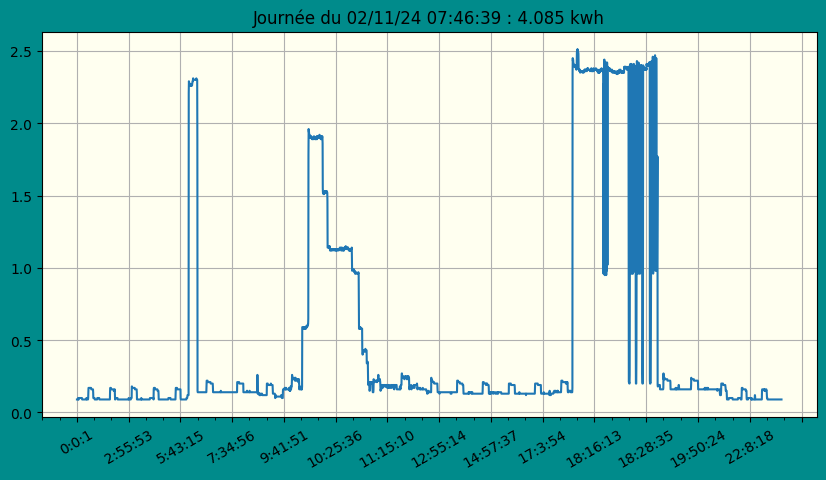

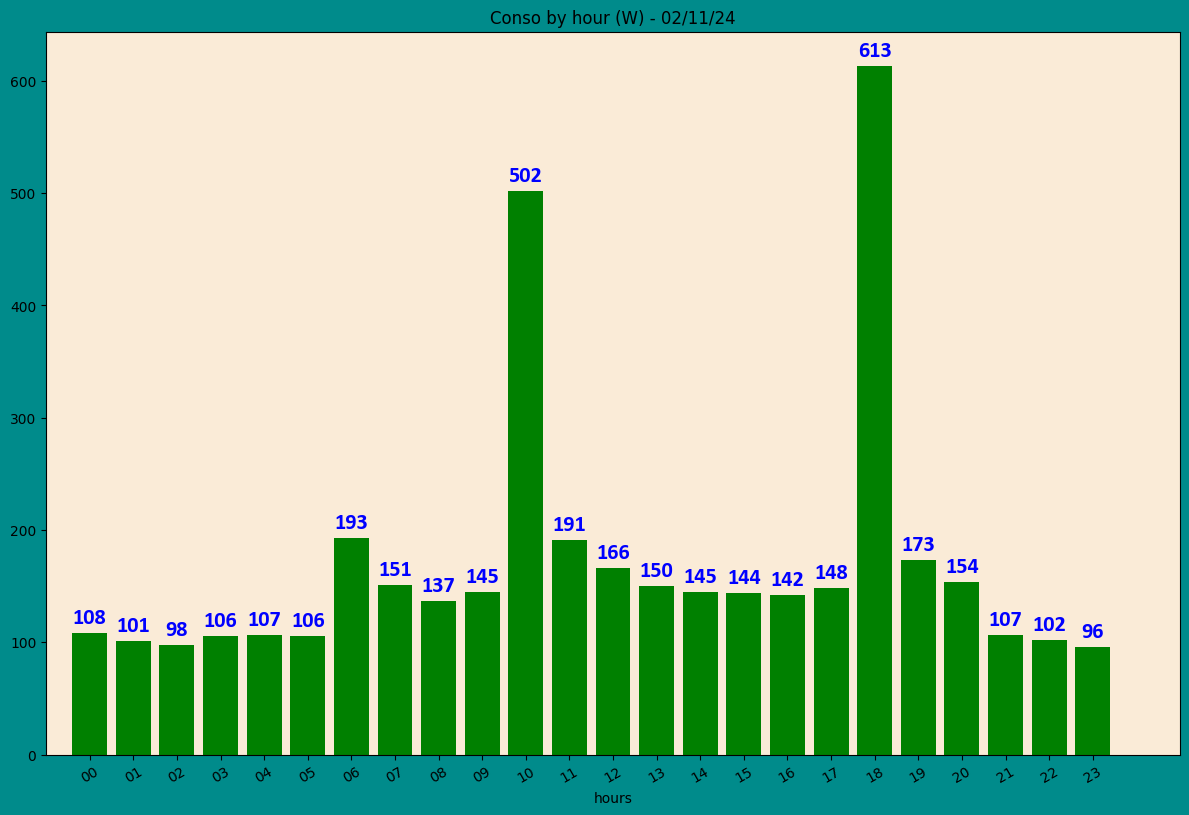

In [558]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [559]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,108,108,NaN,NaN
01,101,209,-7.0,NaN
02,98,307,-3.0,NaN
03,106,413,8.0,NaN
04,107,520,1.0,NaN
05,106,626,-1.0,NaN
06,193,819,87.0,NaN
07,151,970,-42.0,NaN
08,137,1107,-14.0,NaN


In [560]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

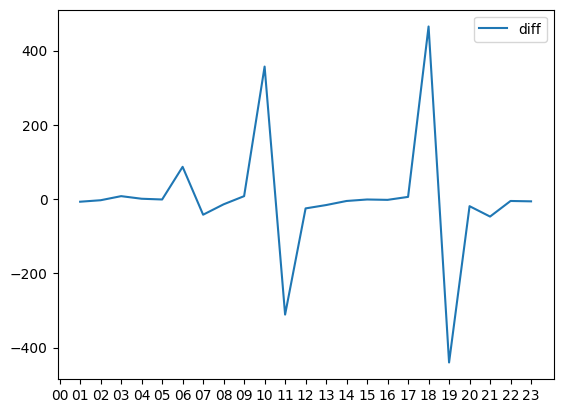

In [561]:
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

In [562]:
# 41 s
# file to big to git sync

# create .gitignore
filename='conso_data.csv'
#conso_data.to_csv(filename)